# Bootstrapping Evaluation

In [1]:
import sys
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
import seaborn as sns
from torch_geometric.data import DataLoader

path = os.path.join('..', '.')
if path not in sys.path:
    sys.path.append(os.path.abspath(path))

from src import evaluation, model_helpers

import pickle as pkl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Reproduce bootstrapping from Carter et al

Same sampling method - each of the 10 samples is the same as in Carter et al

- Get mutations/indexes of ds-test.npy for the samples
- Use the same sample for the bootstraps for evaluation

In [2]:
from sklearn.utils import resample

from statsmodels.stats.weightstats import ztest as ztest

In [3]:
# load the training dataset
X={}
Y={}
Z={}
X['train']={}
Y['train']={}
Z['train']={}
with open('../data/ds-train.npy', 'rb') as f:
    Y['train']['input'] = np.load(f)
    X['train']['input'] = np.load(f)
    Z['train']['input'] = np.load(f, allow_pickle=True)

# load the test dataset
X['test']={}
Y['test']={}
Z['test']={}
with open('../data/ds-test.npy', 'rb') as f:
    Y['test']['input'] = np.load(f)
    X['test']['input'] = np.load(f)
    Z['test']['input'] = np.load(f, allow_pickle=True)
    

In [4]:
number_of_bootstraps = 10

def bootstrap_model(features, labels, mutations):
    x={}
    y={}
    z = {}
    for i in range(number_of_bootstraps):
        x[i],y[i], z[i] = resample(features['test']['input'], labels['test']['input'], mutations['test']['input'], random_state=42+i)

    return x, y, z

In [5]:
x, y, z = bootstrap_model(X, Y, Z)
z

{0: array(['V128G', 'A46S', 'I52N', 'H57Q', 'H43Y', 'G17S', 'F58Y', 'A30P',
        'V128G', 'R176G', 'N11I', 'S88T', 'S59T', 'A46E', 'H82L', 'G108R',
        'Q122L', 'R123C', 'A20E', 'G78D', 'S88T', 'D86N', 'M175I', 'E144G',
        'D49G', 'I90S', 'A30P', 'R29C', 'D110N', 'L116P', 'Q10H', 'F13V',
        'A178D', 'G97D', 'I90S', 'H57Q', 'Q141E', 'Q141E', 'A38S', 'Q141E',
        'D129E', 'Q10P', 'A20S', 'V45L', 'Q122L', 'D129E', 'V139L', 'A30P',
        'A79S', 'L4F', 'P54T', 'H71D', 'Q10H', 'G75D', 'K48T', 'L172R',
        'E173K', 'A20E', 'E144G', 'G16S', 'A3V', 'G60D', 'I90S', 'A20T',
        'A143D', 'E127K', 'A38S', 'A36V', 'R123L', 'H57P', 'I90F', 'H82L',
        'H71D', 'G78D', 'I6F', 'C184Y', 'A79T', 'P62L', 'C184Y', 'E107Q',
        'G124A', 'D49E', 'I31N', 'Q141E', 'K48T', 'L182W', 'S32I', 'H57Q',
        'V7D', 'Q141E', 'L182M', 'Y103D', 'G60D', 'A20E', 'D110V', 'T168A',
        'I90S', 'V163M', 'V157A', 'N112Y', 'H57Q', 'Y95N', 'F50Y', 'Q10H',
        'D8G', 'L172R', 'S8

In [ ]:
# create mapping of mutation to dictionary key
with open('./datasets/x18_exp_l2_graph_dict.pkl', 'rb') as f:
    data = pkl.load(f)

mut_map = {}

for k, v in data['test'].items():
    key = k
    value = v['metadata']['mutation'].values[0]
    mut_map[value] = key

mut_map

{'I90T': 'pnca_mut_99',
 'A161T': 'pnca_mut_3',
 'V7F': 'pnca_mut_188',
 'A39S': 'pnca_mut_15',
 'R123G': 'pnca_mut_142',
 'D86N': 'pnca_mut_38',
 'S104I': 'pnca_mut_150',
 'L116R': 'pnca_mut_104',
 'E91D': 'pnca_mut_53',
 'D8H': 'pnca_mut_41',
 'L35V': 'pnca_mut_116',
 'N149D': 'pnca_mut_129',
 'Y95N': 'pnca_mut_197',
 'V45L': 'pnca_mut_185',
 'H57Q': 'pnca_mut_86',
 'I31N': 'pnca_mut_94',
 'F81S': 'pnca_mut_61',
 'Q10H': 'pnca_mut_136',
 'L172Q': 'pnca_mut_109',
 'N112S': 'pnca_mut_124',
 'G23A': 'pnca_mut_73',
 'A46S': 'pnca_mut_18',
 'D49Y': 'pnca_mut_33',
 'V128G': 'pnca_mut_170',
 'D129E': 'pnca_mut_27',
 'D63N': 'pnca_mut_35',
 'T100A': 'pnca_mut_162',
 'A36V': 'pnca_mut_13',
 'R123L': 'pnca_mut_144',
 'T76S': 'pnca_mut_169',
 'S32R': 'pnca_mut_156',
 'K96T': 'pnca_mut_102',
 'F13V': 'pnca_mut_55',
 'E15G': 'pnca_mut_47',
 'L172R': 'pnca_mut_110',
 'G75V': 'pnca_mut_78',
 'A20E': 'pnca_mut_5',
 'G124D': 'pnca_mut_67',
 'N149H': 'pnca_mut_130',
 'F58I': 'pnca_mut_58',
 'M175L': '

### Evaluate GCN (and control models) with bootstrapped sampling

In [8]:
def evaluate_bootstrap_model(model, data_loaders, show_roc=False):
    sens = []
    spec = []
    roc_auc = []
    f1 = []
    for b in data_loaders:
        print(f"Bootstrap {b}:")

        fpr, tpr, roc_auc_res = evaluation.calculate_roc(model, data_loaders[b])
        if show_roc:
            evaluation.plot_roc_curve(fpr, tpr, roc_auc)
        sens_res,spec_res,f1_res, cm_res = evaluation.calculate_metrics(model, data_loaders[b])
        sens.append(sens_res)
        spec.append(spec_res)
        f1.append(f1_res)
        roc_auc.append(roc_auc_res)

        print("\n --- \n")
        
    return {"sensitivity": sens, "specificity": spec, "f1": f1, "roc_auc": roc_auc, "confusion_matrix": cm_res}

In [12]:
def bootstrap_loop(model,
                   dataset = './datasets/x18_exp_l2_graph_dict.pkl', 
                   remove_mpfs=False,
                   remove_sbmlcore=False,
                   shuffle_edges=False,
                   remove_ews=False
                   ):

    with open(dataset, 'rb') as f:
        
        data = pkl.load(f)
    
    if any([remove_mpfs, remove_sbmlcore, shuffle_edges]):
        # edit dataset for control experiments
        model_helpers.redefine_graph(data,
                                    cutoff_distance=12,
                                    edge_weight_func='exp',
                                    lambda_param=2.0,
                                    normalise_ews=True,
                                    no_node_mpfs=remove_mpfs,
                                    no_node_chem_feats=remove_sbmlcore,
                                    shuffle_edges=shuffle_edges)

    if remove_ews:
        for split in data:
            for sample in data[split]:
                data[split][sample]['graph'].dataset[0]['edge_attr'] = None
    
    bootstrapped_data = {}
    
    # create bootstrapped data
    for i in z:
        bootstrapped_data[i] = []
        for sample in z[i]:
            dict_sample = mut_map[sample]
            bootstrapped_data[i].append(data['test'][dict_sample])
            
    # check bootstrapping matches
    for i in z:
        for j,_ in enumerate(z[i]):
            assert z[i][j] == bootstrapped_data[i][j]['metadata']['mutation'].values[0]
            
    # create data loaders for each bootstrap sample
    data_loaders = {}

    for b in bootstrapped_data:

        loader = DataLoader([sample['graph'].dataset[0] for sample in bootstrapped_data[b]],
                            batch_size=256,
                            shuffle=False)
        
        data_loaders[b] = loader
        

    model = torch.load(model, map_location='cpu')


    res = evaluate_bootstrap_model(model, data_loaders, show_roc=False)
    
    return res

In [13]:
gcn_results = bootstrap_loop(model='saved_models/full_model/F1=0.816_epoch=1119.pth')

shuffle_edge_res = bootstrap_loop(model='saved_models/control_models/Scrambled_graph_3-500epochs/F1=0.704_epoch=431.pth',
                   remove_mpfs=False,
                   remove_sbmlcore=False,
                   shuffle_edges=True
                   )

only_mpfs_res = bootstrap_loop(model='saved_models/control_models/Only_MPfs_1-1500epochs/F1=0.771_epoch=398.pth',
                   remove_mpfs=False,
                   remove_sbmlcore=True,
                   shuffle_edges=False
                   )

only_sbmlcore_res = bootstrap_loop(model='saved_models/control_models/Only_SBMLCore_5-2500epochs/F1=0.692_epoch=1278.pth',
                   remove_mpfs=True,
                   remove_sbmlcore=False,
                   shuffle_edges=False
                   )

no_ews_res = bootstrap_loop(model='saved_models/control_models/final-model_no_ews-1500_epochs/F1=0.790_epoch=839.pth',
                   remove_mpfs=False,
                   remove_sbmlcore=False,
                   shuffle_edges=False,
                   remove_ews=True
                   )


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1232414290.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weight

Bootstrap 0:
Number predicted resistant = 106. Number labeled R = 106
Number predicted susceptible = 94. Number labeled S = 94
Sensitivity: 0.802
Specificity: 0.777
F1 Score: 0.802
Confusion Matrix:
[[73 21]
 [21 85]]

 --- 

Bootstrap 1:
Number predicted resistant = 118. Number labeled R = 121
Number predicted susceptible = 82. Number labeled S = 79
Sensitivity: 0.851
Specificity: 0.810
F1 Score: 0.862
Confusion Matrix:
[[ 64  15]
 [ 18 103]]

 --- 

Bootstrap 2:
Number predicted resistant = 100. Number labeled R = 90
Number predicted susceptible = 100. Number labeled S = 110
Sensitivity: 0.889
Specificity: 0.818
F1 Score: 0.842
Confusion Matrix:
[[90 20]
 [10 80]]

 --- 

Bootstrap 3:
Number predicted resistant = 107. Number labeled R = 109
Number predicted susceptible = 93. Number labeled S = 91
Sensitivity: 0.835
Specificity: 0.824
F1 Score: 0.843
Confusion Matrix:
[[75 16]
 [18 91]]

 --- 

Bootstrap 4:
Number predicted resistant = 96. Number labeled R = 92
Number predicted suscep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1232414290.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weight

Bootstrap 0:
Number predicted resistant = 127. Number labeled R = 106
Number predicted susceptible = 73. Number labeled S = 94
Sensitivity: 0.764
Specificity: 0.511
F1 Score: 0.695
Confusion Matrix:
[[48 46]
 [25 81]]

 --- 

Bootstrap 1:
Number predicted resistant = 130. Number labeled R = 121
Number predicted susceptible = 70. Number labeled S = 79
Sensitivity: 0.777
Specificity: 0.544
F1 Score: 0.749
Confusion Matrix:
[[43 36]
 [27 94]]

 --- 

Bootstrap 2:
Number predicted resistant = 107. Number labeled R = 90
Number predicted susceptible = 93. Number labeled S = 110
Sensitivity: 0.756
Specificity: 0.645
F1 Score: 0.690
Confusion Matrix:
[[71 39]
 [22 68]]

 --- 

Bootstrap 3:
Number predicted resistant = 126. Number labeled R = 109
Number predicted susceptible = 74. Number labeled S = 91
Sensitivity: 0.761
Specificity: 0.527
F1 Score: 0.706
Confusion Matrix:
[[48 43]
 [26 83]]

 --- 

Bootstrap 4:
Number predicted resistant = 116. Number labeled R = 92
Number predicted susceptibl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1232414290.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weight

Bootstrap 0:
Number predicted resistant = 107. Number labeled R = 106
Number predicted susceptible = 93. Number labeled S = 94
Sensitivity: 0.774
Specificity: 0.734
F1 Score: 0.770
Confusion Matrix:
[[69 25]
 [24 82]]

 --- 

Bootstrap 1:
Number predicted resistant = 124. Number labeled R = 121
Number predicted susceptible = 76. Number labeled S = 79
Sensitivity: 0.835
Specificity: 0.709
F1 Score: 0.824
Confusion Matrix:
[[ 56  23]
 [ 20 101]]

 --- 

Bootstrap 2:
Number predicted resistant = 102. Number labeled R = 90
Number predicted susceptible = 98. Number labeled S = 110
Sensitivity: 0.822
Specificity: 0.745
F1 Score: 0.771
Confusion Matrix:
[[82 28]
 [16 74]]

 --- 

Bootstrap 3:
Number predicted resistant = 111. Number labeled R = 109
Number predicted susceptible = 89. Number labeled S = 91
Sensitivity: 0.826
Specificity: 0.769
F1 Score: 0.818
Confusion Matrix:
[[70 21]
 [19 90]]

 --- 

Bootstrap 4:
Number predicted resistant = 99. Number labeled R = 92
Number predicted suscept

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1232414290.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weight

Number predicted resistant = 115. Number labeled R = 106
Number predicted susceptible = 85. Number labeled S = 94
Sensitivity: 0.736
Specificity: 0.606
F1 Score: 0.706
Confusion Matrix:
[[57 37]
 [28 78]]

 --- 

Bootstrap 1:
Number predicted resistant = 112. Number labeled R = 121
Number predicted susceptible = 88. Number labeled S = 79
Sensitivity: 0.694
Specificity: 0.646
F1 Score: 0.721
Confusion Matrix:
[[51 28]
 [37 84]]

 --- 

Bootstrap 2:
Number predicted resistant = 107. Number labeled R = 90
Number predicted susceptible = 93. Number labeled S = 110
Sensitivity: 0.711
Specificity: 0.609
F1 Score: 0.650
Confusion Matrix:
[[67 43]
 [26 64]]

 --- 

Bootstrap 3:
Number predicted resistant = 105. Number labeled R = 109
Number predicted susceptible = 95. Number labeled S = 91
Sensitivity: 0.661
Specificity: 0.637
F1 Score: 0.673
Confusion Matrix:
[[58 33]
 [37 72]]

 --- 

Bootstrap 4:
Number predicted resistant = 100. Number labeled R = 92
Number predicted susceptible = 100. Numb

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1232414290.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weight

Bootstrap 0:
Number predicted resistant = 92. Number labeled R = 106
Number predicted susceptible = 108. Number labeled S = 94
Sensitivity: 0.736
Specificity: 0.851
F1 Score: 0.788
Confusion Matrix:
[[80 14]
 [28 78]]

 --- 

Bootstrap 1:
Number predicted resistant = 117. Number labeled R = 121
Number predicted susceptible = 83. Number labeled S = 79
Sensitivity: 0.802
Specificity: 0.747
F1 Score: 0.815
Confusion Matrix:
[[59 20]
 [24 97]]

 --- 

Bootstrap 2:
Number predicted resistant = 95. Number labeled R = 90
Number predicted susceptible = 105. Number labeled S = 110
Sensitivity: 0.778
Specificity: 0.773
F1 Score: 0.757
Confusion Matrix:
[[85 25]
 [20 70]]

 --- 

Bootstrap 3:
Number predicted resistant = 98. Number labeled R = 109
Number predicted susceptible = 102. Number labeled S = 91
Sensitivity: 0.752
Specificity: 0.824
F1 Score: 0.792
Confusion Matrix:
[[75 16]
 [27 82]]

 --- 

Bootstrap 4:
Number predicted resistant = 89. Number labeled R = 92
Number predicted susceptible

### Evaluate vs Carter et al results

In [19]:
# model performance from carter et al.
model_results = pd.read_csv('../data/carter-model-results.csv')

In [20]:
def compute_f1(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    return 2 * precision * recall / (precision + recall) if (precision + recall) else 0

In [21]:
model_results['f1_mean'] = model_results.apply(lambda row: 100*compute_f1(row["TP"], row["FP"], row["FN"]), axis=1)

In [22]:
def confidence_interval_width(data, confidence=0.95):
    arr = np.array(data)
    n = len(arr)
    sem = stats.sem(arr)
    # h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    h = 1.96 * sem
    return h

In [23]:
for m in ['LR', 'NN', 'XB']:
    f1_vals = model_results[
        (model_results['model'] == m) & (
            model_results['dataset'].isin([f"test_{n}" for n in range(10)])
            )
        ]['f1_mean'].values
    
    roc_auc_vals = model_results[
        (model_results['model'] == m) & (
            model_results['dataset'].isin([f"test_{n}" for n in range(10)])
            )
        ]['roc_auc_mean'].values

    bootstrap_f1_mean = f1_vals.mean()

    model_results.loc[
            ((model_results['model'] == m) & (model_results['dataset'] == "bootstrapped")), "f1_mean"
            ] = bootstrap_f1_mean
    
    model_results.loc[
            ((model_results['model'] == m) & (model_results['dataset'] == "bootstrapped")), "f1_std"
            ] = confidence_interval_width(f1_vals)
    
    model_results.loc[
            ((model_results['model'] == m) & (model_results['dataset'] == "bootstrapped")), "roc_auc_std"
            ] = confidence_interval_width(roc_auc_vals)
    
    

In [24]:
gcn_sens_width = confidence_interval_width(gcn_results['sensitivity'])*100
gcn_spec_width = confidence_interval_width(gcn_results['specificity'])*100
gcn_f1_width = confidence_interval_width(gcn_results['f1'])*100
gcn_roc_auc_width = confidence_interval_width(gcn_results['roc_auc'])*100


In [25]:
# add gcn results to df
gcn_results_row = ["GCN", 
                   "bootstrapped",
                    np.mean(gcn_results['f1'])*100,
                    gcn_f1_width,
                    np.mean(gcn_results['sensitivity'])*100,
                    gcn_sens_width,
                    np.mean(gcn_results['specificity'])*100,
                    gcn_spec_width,
                    np.mean(gcn_results['roc_auc'])*100,
                    gcn_roc_auc_width,
                    np.nan,
                    np.nan,
                    np.nan,
                    np.nan,
                   ]

model_results.loc[len(model_results)] = gcn_results_row

In [26]:
# add gcn bootstrapping results to df
for idx in range(10):
    row = {
        "model": "GCN",
        "dataset": f"test_{idx}",
        "f1_mean": gcn_results['f1'][idx]*100,
        "f1_std": None,
        "sensitivity_mean": gcn_results['sensitivity'][idx]*100,
        "sensitivity_std": None,
        "specificity_mean": gcn_results['specificity'][idx]*100,
        "specificity_std": None,
        "roc_auc_mean": gcn_results['roc_auc'][idx]*100,
        "roc_auc_std": None,
        "TN": None,
        "FP": None,
        "FN": None,
        "TP": None,
    }
    model_results.loc[len(model_results)] = row

/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1048713041.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results.loc[len(model_results)] = row
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1048713041.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results.loc[len(model_results)] = row
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/1048713041.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or al

In [28]:
# find significant differences between models, paired t-tests
from scipy.stats import ttest_rel

models = ['LR', 'NN', 'XB', 'GCN']
bsap_list = [f"test_{n}" for n in range(10)]
metrics = ['f1_mean', 'sensitivity_mean', 'specificity_mean', 'roc_auc_mean']
for ind, m in enumerate(models):
    for m_2 in models[ind+1:]:
        if m == m_2 or (m != 'GCN' and m_2 != 'GCN'):
            continue
        for metric in metrics:
            t_stat, p_val = ttest_rel(
                model_results.loc[(model_results['model'] == m) & (model_results['dataset'].isin(bsap_list)), metric],
                model_results.loc[(model_results['model'] == m_2) & (model_results['dataset'].isin(bsap_list)), metric]
            )
            if p_val <= 0.05:
                print(f"{m} vs {m_2} {metric}: t-statistic = {t_stat:.3f}, p-value = {p_val}")
                if p_val <= 0.001:
                    stars = '***'
                elif p_val <= 0.01:
                    stars = '**'
                elif p_val <= 0.05:
                    stars = '*'
                else:
                    stars = ''
                print(f"Significance: {stars}")

LR vs GCN f1_mean: t-statistic = -6.231, p-value = 0.00015305978182598266
Significance: ***
LR vs GCN sensitivity_mean: t-statistic = -3.362, p-value = 0.008368306277418898
Significance: **
LR vs GCN specificity_mean: t-statistic = -8.054, p-value = 2.096545635164292e-05
Significance: ***
NN vs GCN f1_mean: t-statistic = -15.396, p-value = 8.992252647362142e-08
Significance: ***
NN vs GCN sensitivity_mean: t-statistic = -5.446, p-value = 0.00040764451022776333
Significance: ***
NN vs GCN specificity_mean: t-statistic = -15.254, p-value = 9.749018229279952e-08
Significance: ***
NN vs GCN roc_auc_mean: t-statistic = -6.262, p-value = 0.00014748183972504986
Significance: ***


### Evaluate full Test set for GCN models

In [31]:
loader = DataLoader([data['test'][sample]['graph'].dataset[0] for sample in data['test']],
                          batch_size=256,
                          shuffle=False)

model = torch.load('saved_models/full_model/F1=0.816_epoch=1119.pth', map_location='cpu')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_90849/591092066.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_

In [32]:
test_sens, test_spec, test_f1, test_cm = evaluation.calculate_metrics(model, loader)
fpr, tpr, test_roc_auc = evaluation.calculate_roc(model, loader)

Number predicted resistant = 103. Number labeled R = 103
Number predicted susceptible = 97. Number labeled S = 97
Sensitivity: 0.816
Specificity: 0.804
F1 Score: 0.816
Confusion Matrix:
[[78 19]
 [19 84]]


In [33]:
# add gcn test set performance to df

gcn_test_row = ["GCN", 
                   "test",
                    test_f1*100,
                    gcn_f1_width,
                    test_sens*100,
                    gcn_sens_width,
                    test_spec*100,
                    gcn_spec_width,
                    test_roc_auc*100,
                    gcn_roc_auc_width,
                    test_cm[0, 0],
                    test_cm[0, 1],
                    test_cm[1, 0],
                    test_cm[1, 1],
                   ]

model_results.loc[len(model_results)] = gcn_test_row

In [34]:
model_results

,model,dataset,f1_mean,f1_std,sensitivity_mean,sensitivity_std,specificity_mean,specificity_std,roc_auc_mean,roc_auc_std,TN,FP,FN,TP
0,LR,test,77.358491,NaN,79.611650,NaN,72.164948,NaN,82.784506,NaN,70.0,27.0,21.0,82.0
1,NN,test,70.588235,NaN,75.728155,NaN,58.762887,NaN,75.097588,NaN,57.0,40.0,25.0,78.0
2,XB,test,80.193237,NaN,80.582524,NaN,78.350515,NaN,82.234011,NaN,76.0,21.0,20.0,83.0
3,LR,test_0,75.576037,NaN,77.358491,NaN,69.148936,NaN,80.750703,NaN,65.0,29.0,24.0,82.0
4,LR,test_1,82.258065,NaN,84.297521,NaN,68.354430,NaN,85.594727,NaN,54.0,25.0,19.0,102.0
5,LR,test_2,75.126904,NaN,82.222222,NaN,70.000000,NaN,85.606061,NaN,77.0,33.0,16.0,74.0
6,LR,test_3,80.909091,NaN,81.651376,NaN,75.824176,NaN,82.810767,NaN,69.0,22.0,20.0,89.0
7,LR,test_4,73.469388,NaN,78.260870,NaN,70.370370,NaN,82.357085,NaN,76.0,32.0,20.0,72.0
8,LR,test_5,77.477477,NaN,82.692308,NaN,66.666667,NaN,84.805689,NaN,64.0,32.0,18.0,86.0
9,LR,test_6,70.408163,NaN,74.193548,NaN,68.224299,NaN,77.710783,NaN,73.0,34.0,24.0,69.0


### Create results df for control models

In [35]:
def summarise_bootstrap_results(res, model_name, dataset_name="bootstrapped"):
    return {
        "model": model_name,
        "dataset": dataset_name,
        "f1_mean": np.mean(res['f1'])*100,
        "f1_std": confidence_interval_width(res['f1'])*100,
        "sensitivity_mean": np.mean(res['sensitivity'])*100,
        "sensitivity_std": confidence_interval_width(res['sensitivity'])*100,
        "specificity_mean": np.mean(res['specificity'])*100,
        "specificity_std": confidence_interval_width(res['specificity'])*100,
        "roc_auc_mean": np.mean(res['roc_auc'])*100,
        "roc_auc_std": confidence_interval_width(res['roc_auc'])*100,
        "TN": np.nan,
        "FP": np.nan,
        "FN": np.nan,
        "TP": np.nan,
    }

def summarise_single_bootstrap(res, model_name, idx):
    return {
        "model": model_name,
        "dataset": f"test_{idx}",
        "f1_mean": res['f1'][idx]*100,
        "f1_std": None,
        "sensitivity_mean": res['sensitivity'][idx]*100,
        "sensitivity_std": None,
        "specificity_mean": res['specificity'][idx]*100,
        "specificity_std": None,
        "roc_auc_mean": res['roc_auc'][idx]*100,
        "roc_auc_std": None,
        "TN": np.nan,
        "FP": np.nan,
        "FN": np.nan,
        "TP": np.nan,
    }

control_results_rows = [
    summarise_bootstrap_results(gcn_results, "GCN"),
    summarise_bootstrap_results(shuffle_edge_res, "GCN-shuffleEdges"),
    summarise_bootstrap_results(only_mpfs_res, "GCN-onlyMPFs"),
    summarise_bootstrap_results(only_sbmlcore_res, "GCN-onlySBMLCore"),
    summarise_bootstrap_results(no_ews_res, "GCN-noEWs")
]

# Add per-bootstrap (test_0 to test_9) rows for each control model
for res, name in [
    (gcn_results, "GCN"),
    (shuffle_edge_res, "GCN-shuffleEdges"),
    (only_mpfs_res, "GCN-onlyMPFs"),
    (only_sbmlcore_res, "GCN-onlySBMLCore"),
    (no_ews_res, "GCN-noEWs"),
]:
    for idx in range(10):
        control_results_rows.append(summarise_single_bootstrap(res, name, idx))

control_results_df = pd.DataFrame(control_results_rows)
control_results_df

,model,dataset,f1_mean,f1_std,sensitivity_mean,sensitivity_std,specificity_mean,specificity_std,roc_auc_mean,roc_auc_std,TN,FP,FN,TP
0,GCN,bootstrapped,81.379955,2.126958,81.477206,2.592420,79.900912,1.507957,81.636561,2.115863,NaN,NaN,NaN,NaN
1,GCN-shuffleEdges,bootstrapped,69.645337,1.491202,74.471495,1.577684,57.151184,2.612056,73.578124,1.416227,NaN,NaN,NaN,NaN
2,GCN-onlyMPFs,bootstrapped,76.770759,2.270525,78.825575,2.371748,71.346975,2.312288,80.175824,1.980630,NaN,NaN,NaN,NaN
3,GCN-onlySBMLCore,bootstrapped,67.570036,2.874331,68.577916,2.982492,63.187211,1.527872,66.861852,1.658610,NaN,NaN,NaN,NaN
4,GCN-noEWs,bootstrapped,78.262514,2.416679,75.755022,1.891198,80.946063,2.855338,79.572648,1.793486,NaN,NaN,NaN,NaN
5,GCN,test_0,80.188679,NaN,80.188679,NaN,77.659574,NaN,81.101967,NaN,NaN,NaN,NaN,NaN
6,GCN,test_1,86.192469,NaN,85.123967,NaN,81.012658,NaN,84.684590,NaN,NaN,NaN,NaN,NaN
7,GCN,test_2,84.210526,NaN,88.888889,NaN,81.818182,NaN,86.555556,NaN,NaN,NaN,NaN,NaN
8,GCN,test_3,84.259259,NaN,83.486239,NaN,82.417582,NaN,84.534731,NaN,NaN,NaN,NaN,NaN
9,GCN,test_4,78.723404,NaN,80.434783,NaN,79.629630,NaN,80.545491,NaN,NaN,NaN,NaN,NaN


### Create Results Bar Chart

In [36]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.labelsize'] = 12

In [ ]:
def plot_metric_bars(model_metrics, labels):
    colours = ['#e41a1c',
           '#377eb8',
           '#4daf4a',
           '#984ea3',
        'orange'
           ]
    
    models = model_metrics['model'].values

    metrics = {
        'F1': (
            model_metrics['f1_mean'].values,
            model_metrics['f1_std'].astype(float).values
        ),
        'Sensitivity': (
            model_metrics['sensitivity_mean'].values,
            model_metrics['sensitivity_std'].astype(float).values
        ),
        'Specificity': (
            model_metrics['specificity_mean'].values,
            model_metrics['specificity_std'].astype(float).values
        ),
        'ROC AUC': (
            model_metrics['roc_auc_mean'].values,
            model_metrics['roc_auc_std'].astype(float).values
        ),
    }
    fig, axs = plt.subplots(2, 2, figsize=(10.5,7))
    # fig, axs = plt.subplots(1, 4, figsize=(10,3))

    for i, (metric, (vals, errs)) in enumerate(metrics.items()):
        ax = axs[i // 2, i % 2]
        x = np.arange(len(models))
        
        bars = ax.bar(x, vals, yerr=errs, capsize=2, width=0.85, 
                    color='white', edgecolor=colours,
                    linewidth=2,
                    alpha=0.7
                    )

        # metric values labelled above bars
        for bar, value, error in zip(bars, vals, errs):
            ax.text(bar.get_x() + bar.get_width() / 2, value + error + 1, f'{value:.1f}',
                    ha='center', va='bottom',
                    fontsize=12,
                    # color='black'
                    )

        # metric label below x axis, x ticks but no labels
        ax.set_xlabel(metric, labelpad=6)
        ax.set_xticks(np.arange(len(models)))
        ax.set_xticklabels([])
        
        ax.set_ylim(0, max(vals + errs) + 10)
        ax.spines[['top', 'right', 'left']].set_visible(False)
        ax.tick_params(left=False, labelleft=False)

    # legend
    legend_elements = [Patch(facecolor="white", alpha=0.5, edgecolor=colours[i], linewidth=2, 
                            #  label=models[i]
                            label=labels[i]
                            ) for i in range(len(models))]
    fig.legend(handles=legend_elements, loc='upper right', 
            frameon=False)

    plt.tight_layout(rect=[0, 0, 0.92,1])  # space for legend on right
    plt.show()


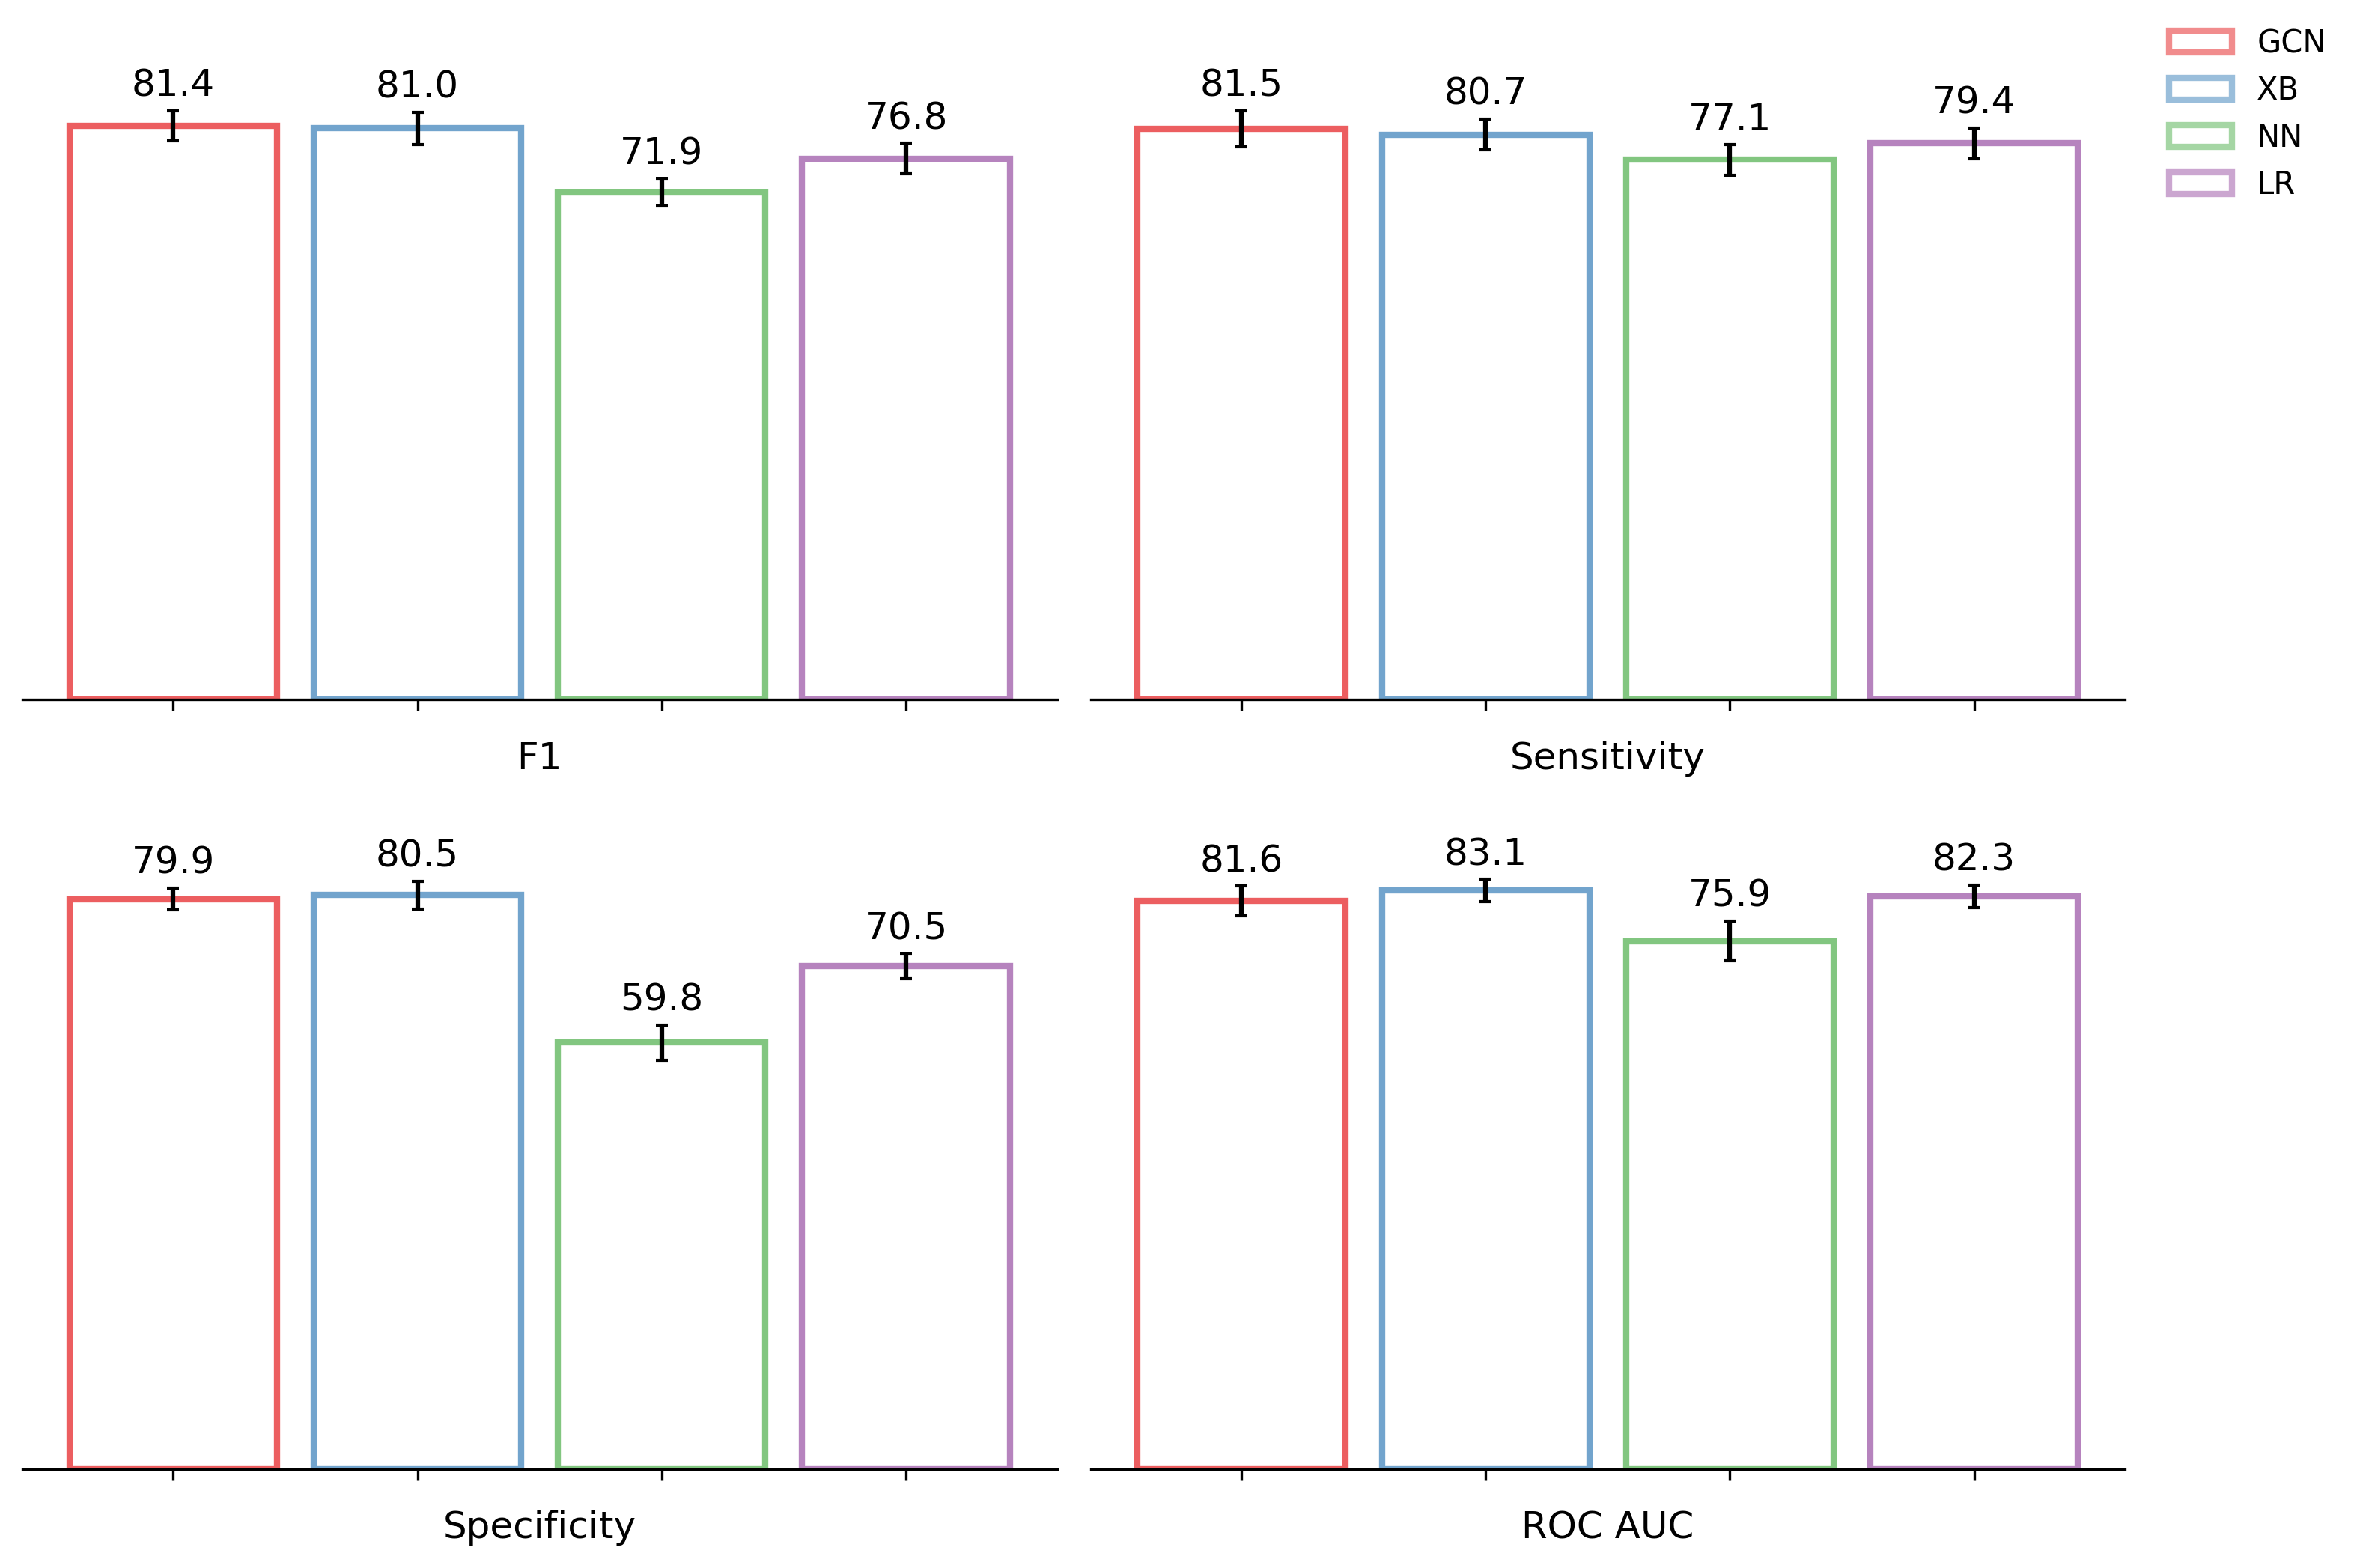

In [38]:
# GCN results vs classical machine learning models

model_metrics = model_results[model_results['dataset'] == 'bootstrapped'][::-1] 

labels = model_metrics['model'].values

plot_metric_bars(model_metrics= model_metrics,
                 labels=labels
                 )

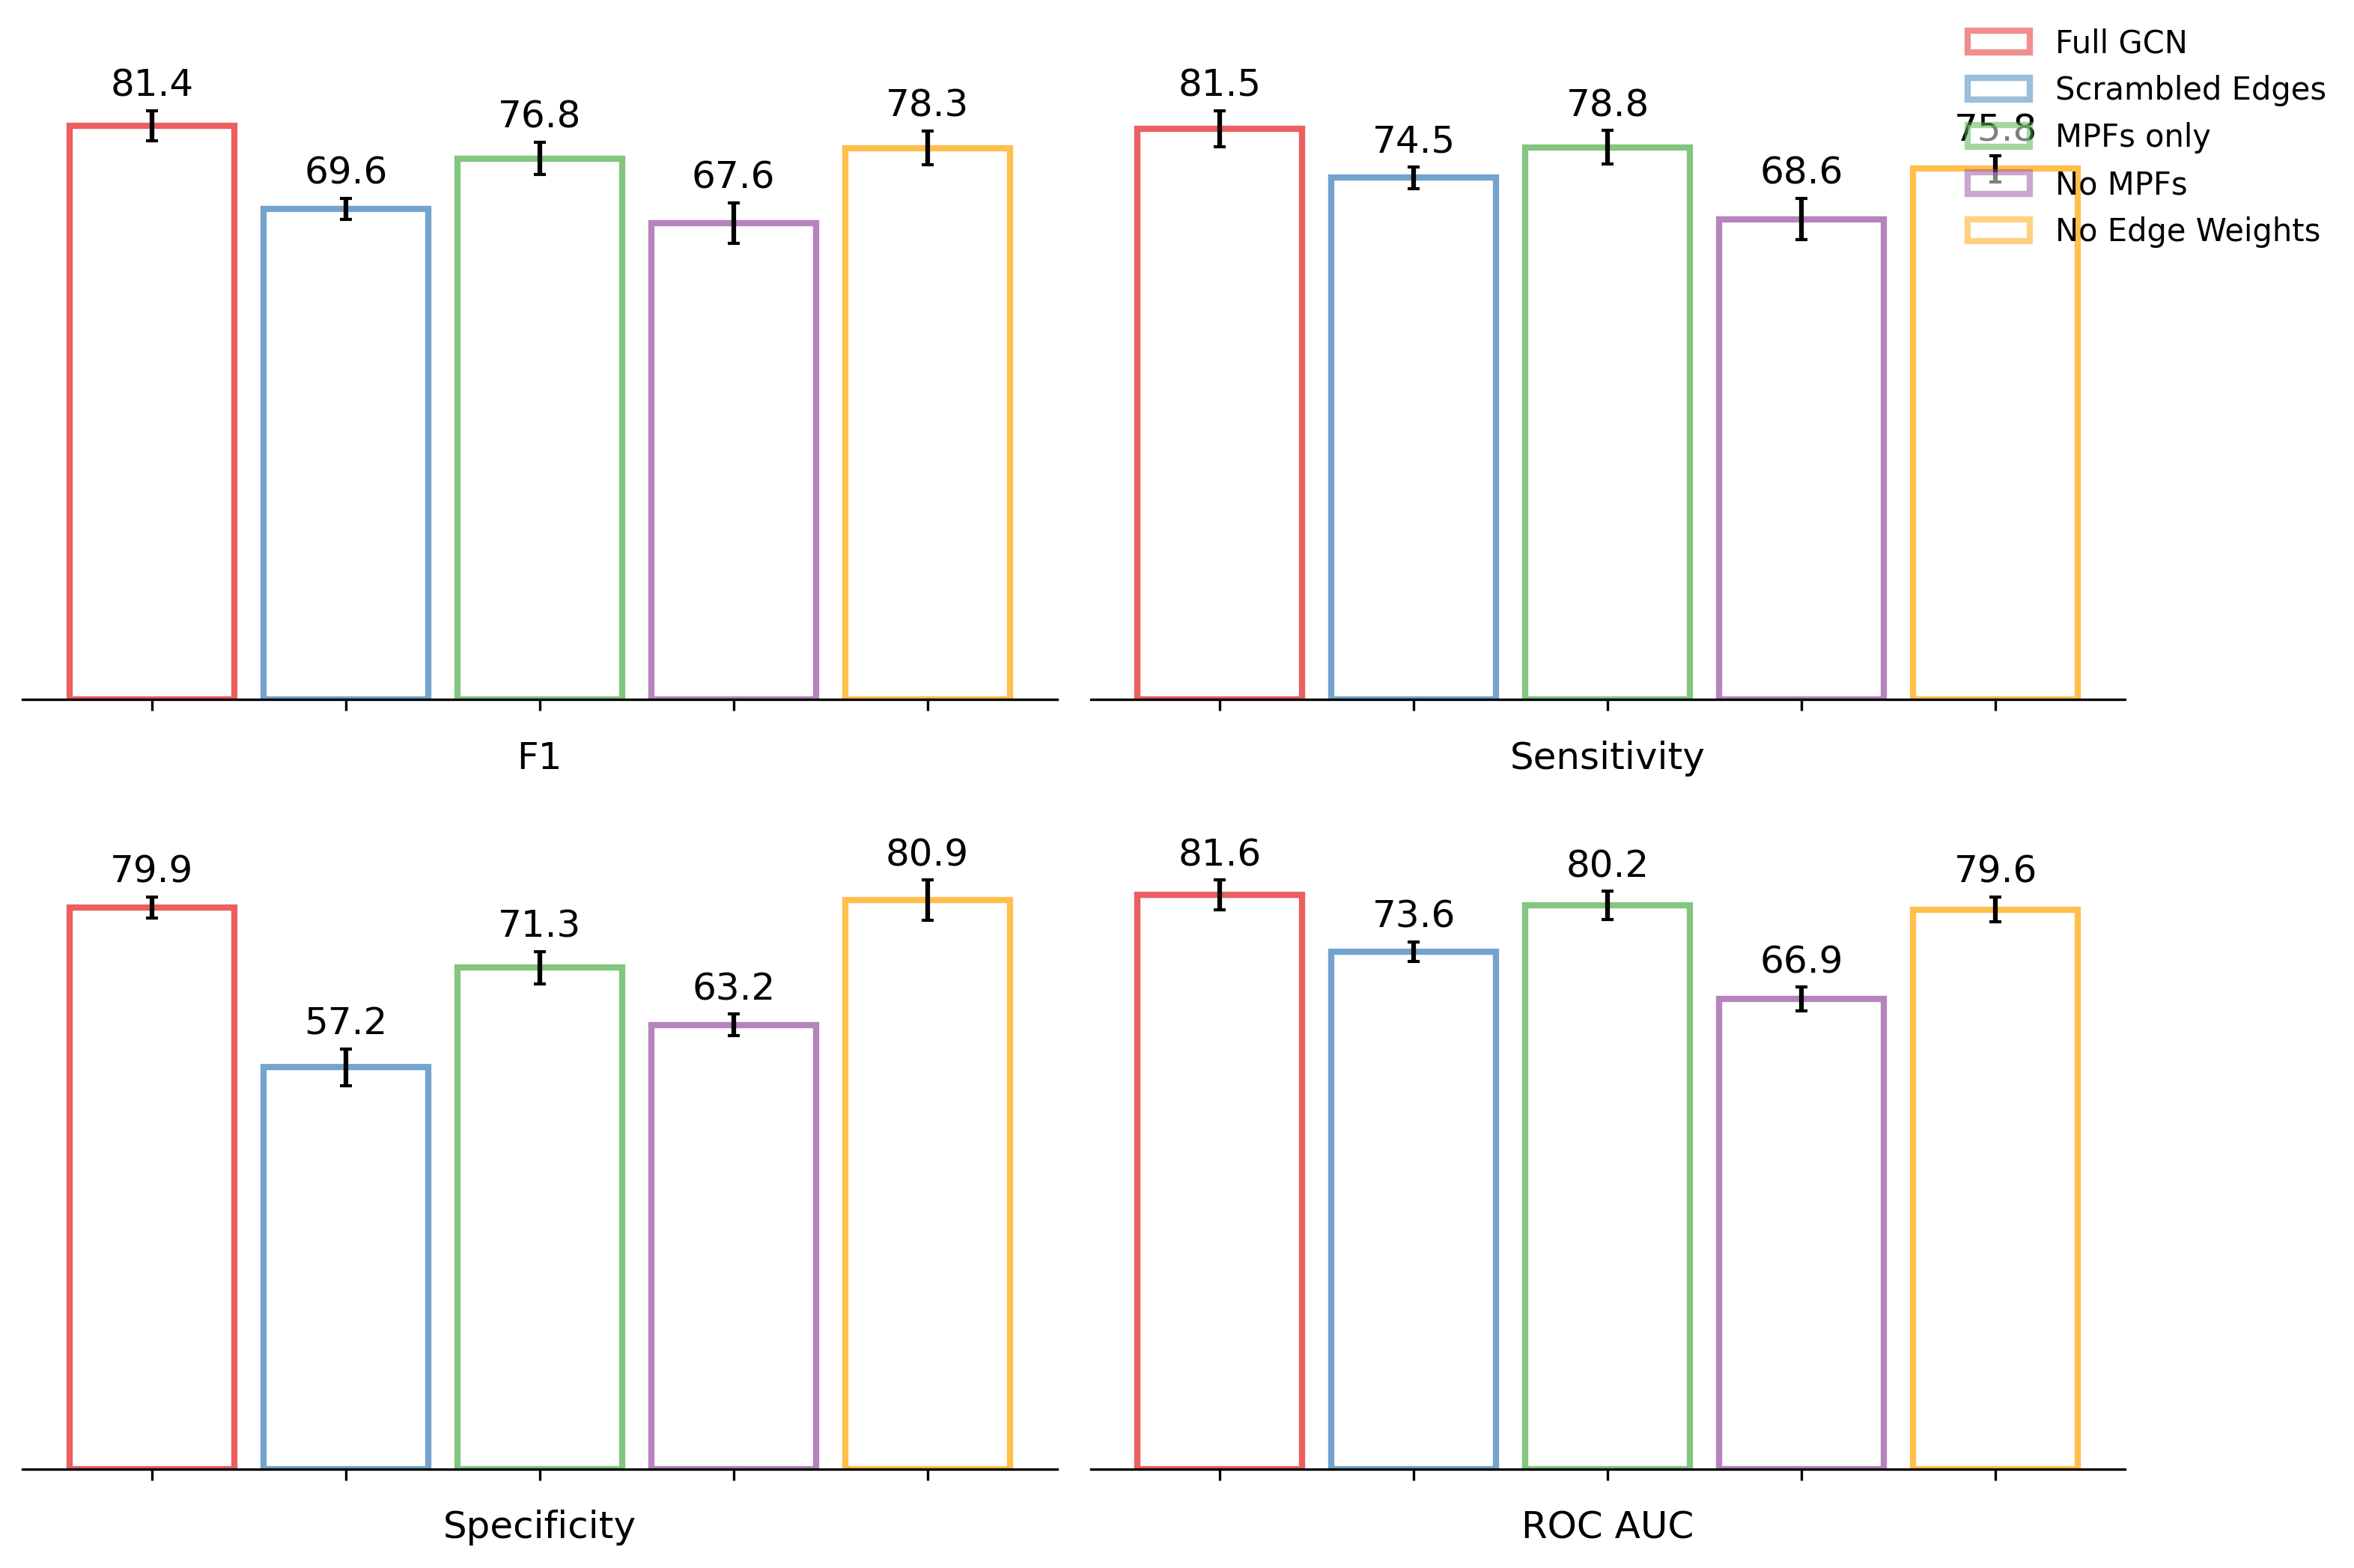

In [39]:
# GCN results vs control models

model_metrics = control_results_df[control_results_df['dataset'] == 'bootstrapped']

labels = [
        'Full GCN',
        'Scrambled Edges',
        'MPFs only',
        'No MPFs',
        'No Edge Weights'
        ]

plot_metric_bars(model_metrics= model_metrics,
                 labels=labels
                 )

### Get significant differences for control models

In [43]:
control_results_df[control_results_df['dataset'] == 'bootstrapped']['model'].values

array(['GCN', 'GCN-shuffleEdges', 'GCN-onlyMPFs', 'GCN-onlySBMLCore',
       'GCN-noEWs'], dtype=object)

In [44]:
# models = ['LR', 'NN', 'XB', 'GCN']
models = control_results_df[control_results_df['dataset'] == 'bootstrapped']['model'].values
bsap_list = [f"test_{n}" for n in range(10)]
metrics = ['f1_mean', 'sensitivity_mean', 'specificity_mean', 'roc_auc_mean']
for ind, model in enumerate(models):
    for model_2 in models[ind+1:]:
        if model == model_2 or (model != 'GCN' and model_2 != 'GCN'):
            continue
        for metric in metrics:
            t_stat, p_val = ttest_rel(
                control_results_df.loc[(control_results_df['model'] == model) & (control_results_df['dataset'].isin(bsap_list)), metric],
                control_results_df.loc[(control_results_df['model'] == model_2) & (control_results_df['dataset'].isin(bsap_list)), metric]
            )
            if p_val <= 0.05:
                print(f"{model} vs {model_2} {metric}: t-statistic = {t_stat:.3f}, p-value = {p_val}")
                if p_val <= 0.001:
                    stars = '***'
                elif p_val <= 0.01:
                    stars = '**'
                elif p_val <= 0.05:
                    stars = '*'
                else:
                    stars = ''
                print(f"Significance: {stars}")

GCN vs GCN-shuffleEdges f1_mean: t-statistic = 15.381, p-value = 9.073069261142867e-08
Significance: ***
GCN vs GCN-shuffleEdges sensitivity_mean: t-statistic = 6.308, p-value = 0.00013961770216253637
Significance: ***
GCN vs GCN-shuffleEdges specificity_mean: t-statistic = 17.390, p-value = 3.10484454128761e-08
Significance: ***
GCN vs GCN-shuffleEdges roc_auc_mean: t-statistic = 11.055, p-value = 1.5434757326364893e-06
Significance: ***
GCN vs GCN-onlyMPFs f1_mean: t-statistic = 9.527, p-value = 5.349257740809129e-06
Significance: ***
GCN vs GCN-onlyMPFs sensitivity_mean: t-statistic = 4.226, p-value = 0.002219103779853227
Significance: **
GCN vs GCN-onlyMPFs specificity_mean: t-statistic = 7.966, p-value = 2.289321411565749e-05
Significance: ***
GCN vs GCN-onlyMPFs roc_auc_mean: t-statistic = 4.118, p-value = 0.0026073074997659002
Significance: **
GCN vs GCN-onlySBMLCore f1_mean: t-statistic = 9.633, p-value = 4.882040034076683e-06
Significance: ***
GCN vs GCN-onlySBMLCore sensitivi

### Plot confusion matrixes

In [45]:
cms = model_results[(model_results['dataset'] == 'test') & (model_results['model'].isin(['GCN', 'XB']))][['model', 'TN', 'FP', 'FN', 'TP']][::-1]

In [46]:
cms.iloc[1][['TP', 'FP', 'FN', 'TN']].values.astype('int').reshape(2,2)

array([[83, 21],
       [20, 76]])

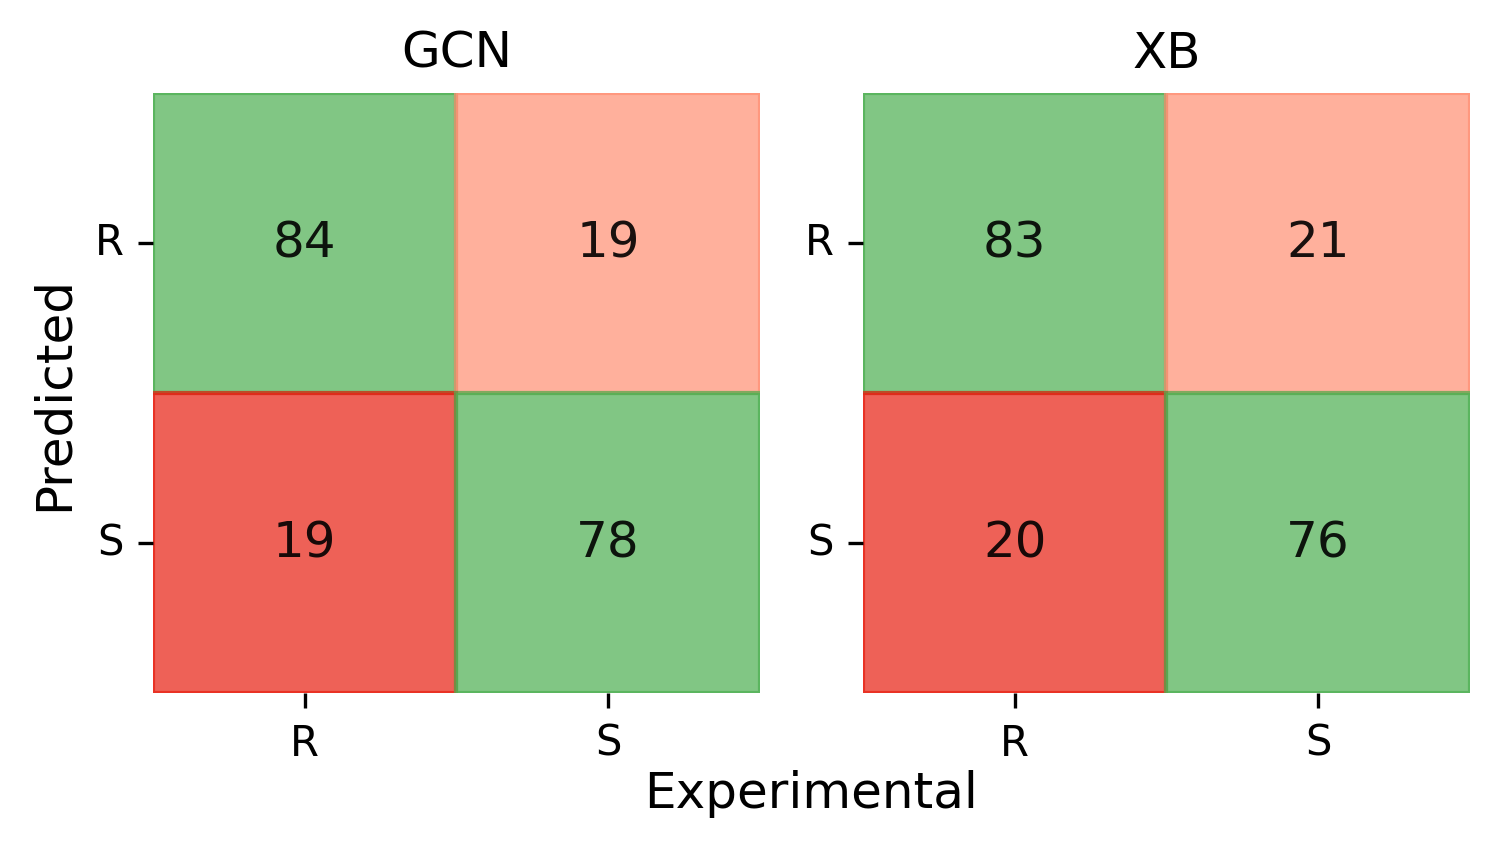

In [60]:
fig = plt.figure(figsize=(5.1, 2.75))

# define colors per position: [[TP, FP], [FN, TN]]
cell_colours = [['#4CAF50', "#FF8F73EA"], 
               ["#E81E10", '#4CAF50']] 

for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
    
    cm = cms.iloc[i][['TP', 'FP', 'FN', 'TN']].values.astype(int).reshape(2, 2)
    
    # blank heatmap with no color
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
                xticklabels=['R', 'S'], yticklabels=['R', 'S'],
                linewidths=0.5, linecolor='grey', 
                annot_kws={'color': 'black', 'alpha': 0.9, 
                           'fontsize': 12
                           },
                alpha=0
                )

    # color each cell
    for row in range(2):
        for col in range(2):
            rect = Rectangle((col, row), 1, 1, fill=True, color=cell_colours[row][col], alpha=0.7)
            ax.add_patch(rect)
    if i == 0:
        # plt.xlabel('Experimental')
        plt.ylabel('Predicted')
    plt.title(cms.iloc[i]['model'])
    plt.yticks(rotation=0)

# xlabel in the middle between the two matrices
fig.text(0.54, 0.02, 'Experimental', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()
